# Trabajo Final
## Integrantes:


*   Jarol Andres Hernandez Rincón - 20162005862
*   Miguel Esteban Pinilla Leal - 20191005036





# Dataset Images

https://www.kaggle.com/code/sc0v1n0/animals-images-classification/input

# Modelo Grounding Dino

In [1]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

fatal: destination path 'GroundingDINO' already exists and is not an empty directory.


In [2]:
!ls -la

total 40
drwxr-xr-x 1 root root  4096 Nov 21 00:01 .
drwxr-xr-x 1 root root  4096 Nov 20 23:40 ..
drwxr-xr-x 4 root root  4096 Nov 19 14:23 .config
drwxr-xr-x 7 root root  4096 Nov 21 00:00 GroundingDINO
drwxr-xr-x 2 root root 12288 Nov 20 23:57 images
drwxr-xr-x 2 root root  4096 Nov 20 23:56 .ipynb_checkpoints
drwxr-xr-x 1 root root  4096 Nov 19 14:23 sample_data
drwxr-xr-x 2 root root  4096 Nov 21 00:01 weights


In [3]:
%cd ./GroundingDINO/

/content/GroundingDINO


In [4]:
!pip install -q -e .

  Preparing metadata (setup.py) ... done


In [5]:
!pip install supervision

In [6]:
%cd ..
!mkdir weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights

/content
mkdir: cannot create directory ‘weights’: File exists


In [7]:
!ls -la

total 40
drwxr-xr-x 1 root root  4096 Nov 21 00:01 .
drwxr-xr-x 1 root root  4096 Nov 20 23:40 ..
drwxr-xr-x 4 root root  4096 Nov 19 14:23 .config
drwxr-xr-x 7 root root  4096 Nov 21 00:00 GroundingDINO
drwxr-xr-x 2 root root 12288 Nov 20 23:57 images
drwxr-xr-x 2 root root  4096 Nov 20 23:56 .ipynb_checkpoints
drwxr-xr-x 1 root root  4096 Nov 19 14:23 sample_data
drwxr-xr-x 2 root root  4096 Nov 21 00:03 weights


In [8]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
     "weights/groundingdino_swint_ogc.pth")

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [11]:
!ls -la | ls /content/images

0_cat.png    132_cat.png  165_cat.png  198_cat.png  22_cat.png	 36_cat.png  69_cat.png
100_cat.png  133_cat.png  166_cat.png  199_cat.png  230_cat.png  37_cat.png  6_cat.png
101_cat.png  134_cat.png  167_cat.png  19_cat.png   231_cat.png  38_cat.png  70_cat.png
102_cat.png  135_cat.png  168_cat.png  1_cat.png    232_cat.png  39_cat.png  71_cat.png
103_cat.png  136_cat.png  169_cat.png  200_cat.png  233_cat.png  3_cat.png   72_cat.png
104_cat.png  137_cat.png  16_cat.png   201_cat.png  234_cat.png  40_cat.png  73_cat.png
105_cat.png  138_cat.png  170_cat.png  202_cat.png  235_cat.png  41_cat.png  74_cat.png
106_cat.png  139_cat.png  171_cat.png  203_cat.png  236_cat.png  42_cat.png  75_cat.png
107_cat.png  13_cat.png   172_cat.png  204_cat.png  237_cat.png  43_cat.png  76_cat.png
108_cat.png  140_cat.png  173_cat.png  205_cat.png  238_cat.png  44_cat.png  77_cat.png
109_cat.png  141_cat.png  174_cat.png  206_cat.png  239_cat.png  45_cat.png  78_cat.png
10_cat.png   142_cat.png  175_cat.

In [17]:
import os
from PIL import Image

# Montar Google Drive si tienes tus imágenes en Drive (opcional)
# from google.colab import drive
# drive.mount('/content/drive')

# Directorios
input_folder = '/content/images'  # Ruta a la carpeta de entrada con las imágenes originales
output_folder = '/content/resized_images'  # Ruta a la carpeta de salida para guardar imágenes redimensionadas

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Tamaño objetivo
target_size = (128, 128)

# Función para redimensionar y mantener la proporción con relleno
def resize_with_padding(image, target_size):
    # Obtener dimensiones originales
    original_width, original_height = image.size

    # Calcular proporciones
    ratio = min(target_size[0] / original_width, target_size[1] / original_height)
    new_width = int(original_width * ratio)
    new_height = int(original_height * ratio)

    # Redimensionar imagen manteniendo proporción
    resized_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    # Crear una nueva imagen con fondo negro (o blanco) del tamaño objetivo
    new_image = Image.new("RGB", target_size, (0, 0, 0))  # Fondo negro
    # Si prefieres fondo blanco, cambia (0, 0, 0) por (255, 255, 255)

    # Pegar la imagen redimensionada centrada en la nueva imagen
    top_left_x = (target_size[0] - new_width) // 2
    top_left_y = (target_size[1] - new_height) // 2
    new_image.paste(resized_image, (top_left_x, top_left_y))

    return new_image

# Procesar todas las imágenes en la carpeta de entrada
for image_file in os.listdir(input_folder):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, image_file)

        # Cargar la imagen
        with Image.open(image_path) as img:
            # Redimensionar manteniendo aspecto
            resized_img = resize_with_padding(img, target_size)

            # Guardar la imagen redimensionada en la carpeta de salida
            output_path = os.path.join(output_folder, image_file)
            resized_img.save(output_path)

print(f"Redimensionamiento completo. Imágenes guardadas en {output_folder}")


Redimensionamiento completo. Imágenes guardadas en /content/resized_images


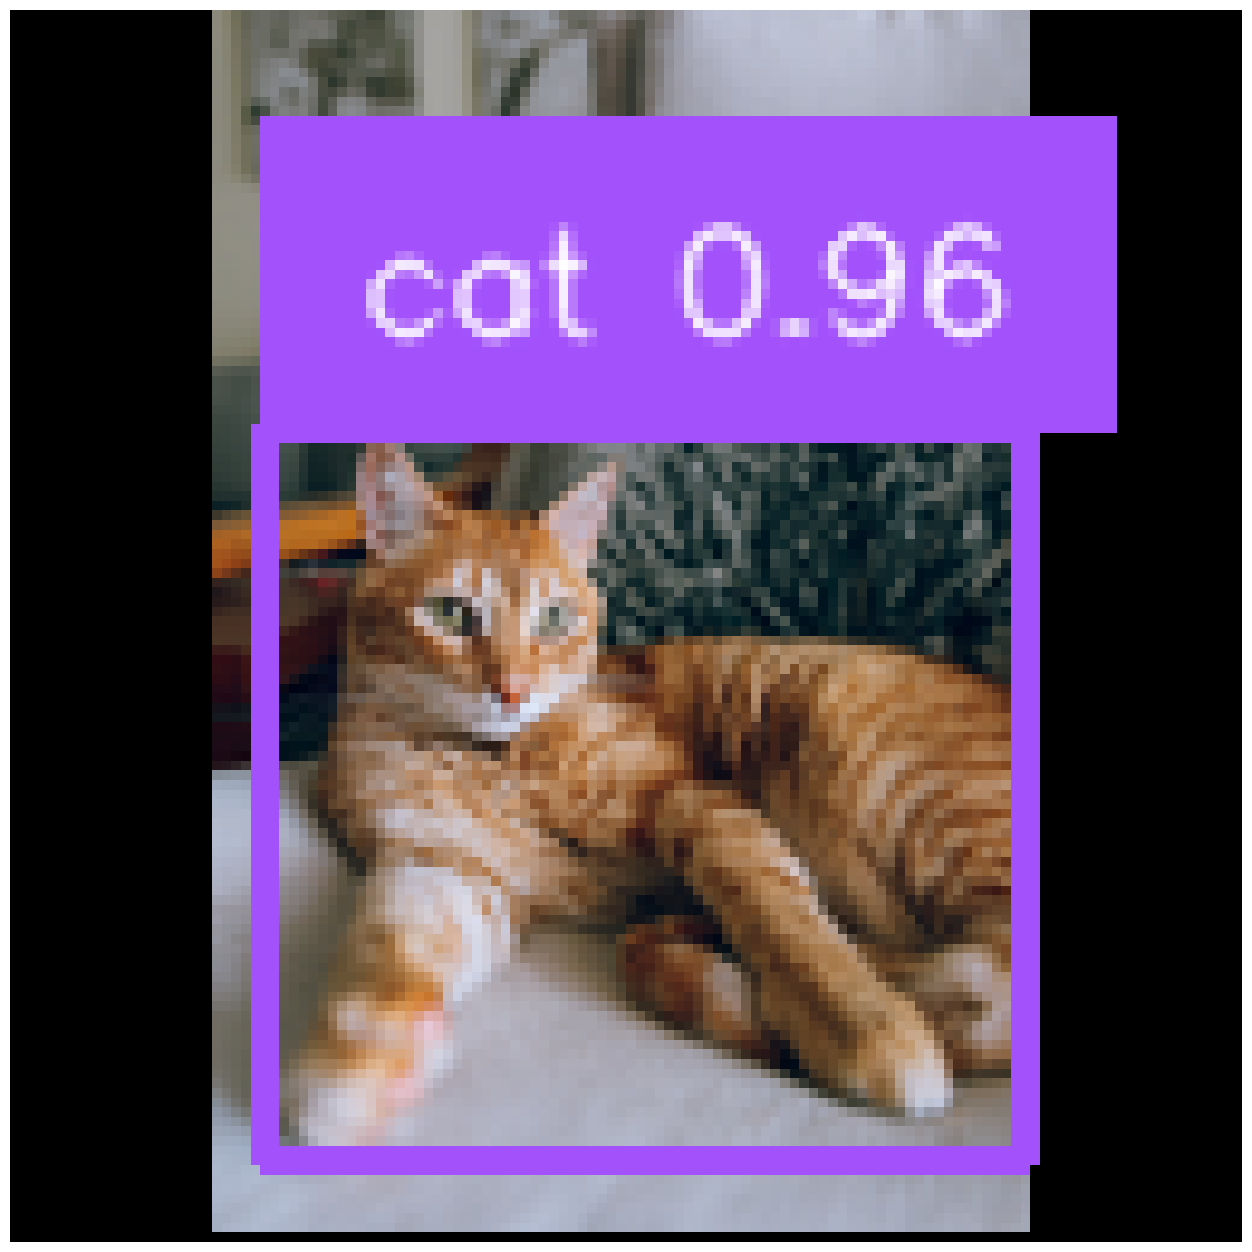

In [22]:
import os
import supervision as sv
import torch
image_path="/content/resized_images/112_cat.png"
text="Cat"#"Gatos"
BOX_THRESHOLD = 0.26
TEXT_TRHESHOLD = 0.30
image_source, image = load_image(image_path)
boxes, logits,  phrases = predict(
    model=model,
    image=image,
    caption=text,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_TRHESHOLD,
    device='cpu'
)
annotated_frame = annotate(
    image_source=image_source,
    boxes=boxes,
    logits=logits,
    phrases=phrases)

sv.plot_image(annotated_frame,(16,16))

# Modelo SAM - Primer Prueba

In [43]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install torch torchvision
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-s2txn23a
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-s2txn23a
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ecoko79p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ecoko79p
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
--2024-11-21 01:25:11--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.19, 18.238.176.44, 18.238.176.126, ...

In [44]:
!ls -la

total 2504508
drwxr-xr-x 1 root root       4096 Nov 21 01:25 .
drwxr-xr-x 1 root root       4096 Nov 20 23:40 ..
drwxr-xr-x 4 root root       4096 Nov 19 14:23 .config
drwxr-xr-x 2 root root       4096 Nov 21 00:36 detection
drwxr-xr-x 7 root root       4096 Nov 21 00:00 GroundingDINO
drwxr-xr-x 3 root root      12288 Nov 21 00:13 images
drwxr-xr-x 2 root root       4096 Nov 20 23:56 .ipynb_checkpoints
drwxr-xr-x 2 root root      12288 Nov 21 00:26 resized_images
drwxr-xr-x 1 root root       4096 Nov 19 14:23 sample_data
-rw-r--r-- 1 root root 2564550879 Apr  4  2023 sam_vit_h_4b8939.pth
drwxr-xr-x 2 root root       4096 Nov 21 00:03 weights


In [6]:
!pip install opencv-python-headless  # Si tienes problemas con OpenCV
import torch
from segment_anything import sam_model_registry, SamPredictor

# Ruta al archivo del modelo SAM descargado
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"  # Usar GPU si está disponible

# Cargar el modelo SAM
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [46]:
!ls -la

total 2504508
drwxr-xr-x 1 root root       4096 Nov 21 01:25 .
drwxr-xr-x 1 root root       4096 Nov 20 23:40 ..
drwxr-xr-x 4 root root       4096 Nov 19 14:23 .config
drwxr-xr-x 2 root root       4096 Nov 21 00:36 detection
drwxr-xr-x 7 root root       4096 Nov 21 00:00 GroundingDINO
drwxr-xr-x 3 root root      12288 Nov 21 00:13 images
drwxr-xr-x 2 root root       4096 Nov 20 23:56 .ipynb_checkpoints
drwxr-xr-x 2 root root      12288 Nov 21 00:26 resized_images
drwxr-xr-x 1 root root       4096 Nov 19 14:23 sample_data
-rw-r--r-- 1 root root 2564550879 Apr  4  2023 sam_vit_h_4b8939.pth
drwxr-xr-x 2 root root       4096 Nov 21 00:03 weights


In [3]:
!pip install opencv-python-headless

In [ ]:
import cv2
import matplotlib.pyplot as plt  # Importar matplotlib
from segment_anything import sam_model_registry, SamPredictor

# Cargar la imagen desde la ruta
image_path = '/content/resized_images/100_cat.png'  # Cambia esto a la ruta de tu imagen
image = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if image is None:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el archivo.")
else:
    # Convertir la imagen de BGR a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen original
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # No mostrar los ejes
    plt.show()

# Preprocesar la imagen para SAM
predictor.set_image(image_rgb)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Asegúrate de que la imagen ha sido cargada correctamente
image_path = '/content/resized_images/100_cat.png'  # Ruta a la imagen
image = cv2.imread(image_path)

if image is None:
    print(f"Error: No se pudo cargar la imagen desde {image_path}. Verifica la ruta y el archivo.")
else:
    # Convertir la imagen de BGR a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen original
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # Preprocesar la imagen para SAM (asumimos que ya has cargado el modelo y creado el predictor)
    predictor.set_image(image_rgb)  # Asegúrate de que el predictor esté correctamente configurado

    # Selección manual del punto sobre el gato para iniciar la segmentación
    input_point = np.array([[30, 30]])  # Asegúrate de que el punto está en el objeto a segmentar
    input_label = np.array([1])  # 1 para el objeto (gato)

    # Generar la máscara de segmentación usando SAM
    masks, scores, logits = predictor.predict(
        point_coords=input_point,  # Las coordenadas del punto que seleccionaste
        point_labels=input_label,  # La etiqueta (1 para el objeto)
        multimask_output=False  # Solo una máscara (puedes poner True si necesitas más de una)
    )

    # Verificar si la máscara se generó correctamente
    if masks is None or masks[0] is None:
        print("Error: No se generó una máscara de segmentación.")
    else:
        # Mostrar la máscara generada
        plt.figure(figsize=(10, 10))
        plt.imshow(masks[0], cmap='jet', alpha=0.5)  # Usar transparencia en la máscara
        plt.imshow(image_rgb)  # Mostrar la imagen original encima de la máscara
        plt.axis('off')
        plt.show()


# Modelo SAM - Segunda Prueba

In [14]:

import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.5.1+cu121
Torchvision version: 0.20.1+cu121
CUDA is available: False
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-iwwnm2xh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-iwwnm2xh
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
mkdir: cannot create directory ‘images’: File exists
--2024-11-21 02:23:43--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg’

dog.

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [16]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [17]:
image = cv2.imread('/content/resized_images/100_cat.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

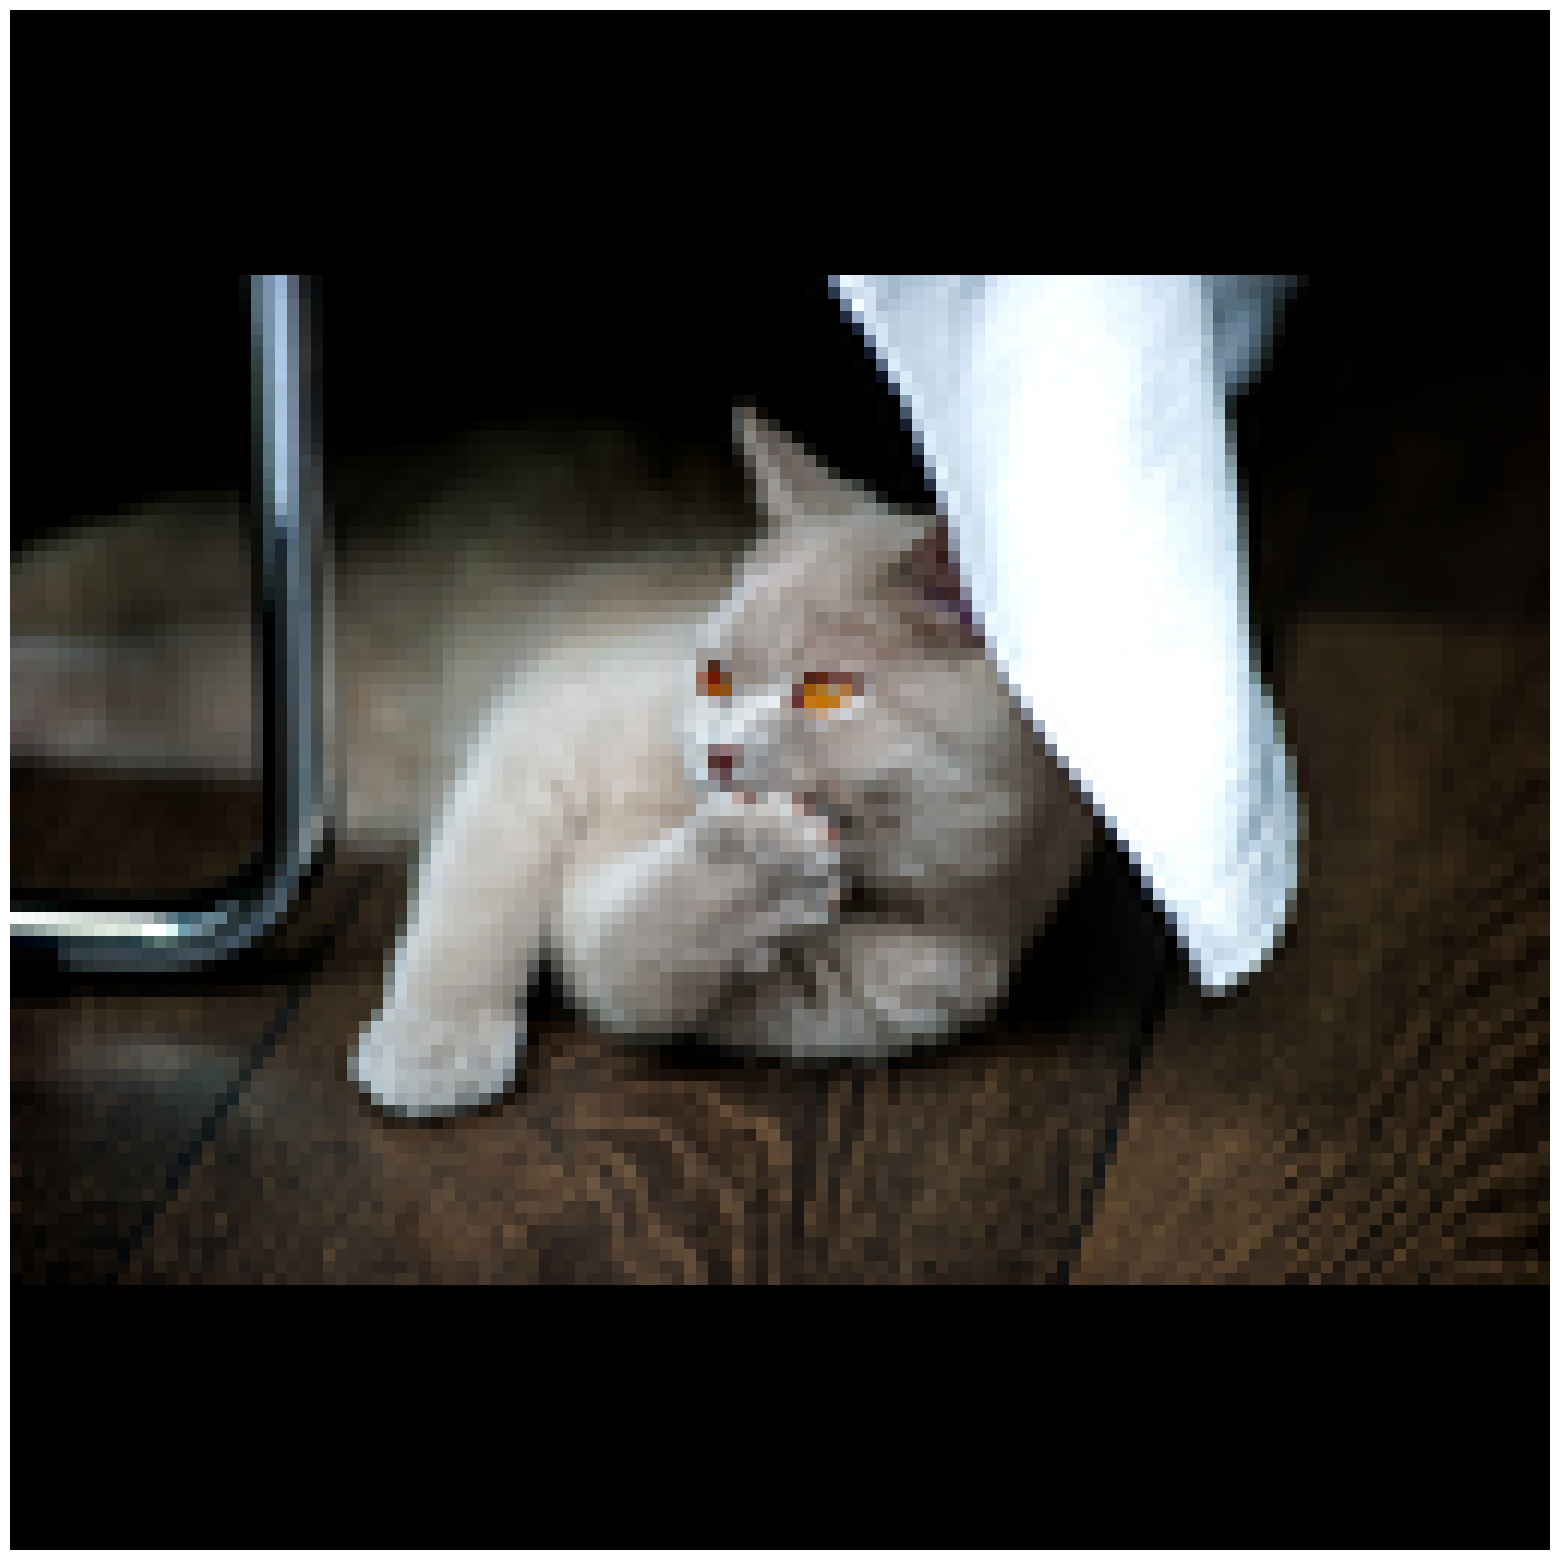

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

### Automatic Mask Generation

In [19]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [20]:
masks = mask_generator.generate(image)

In [21]:
print(len(masks))
print(masks[0].keys())

20
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


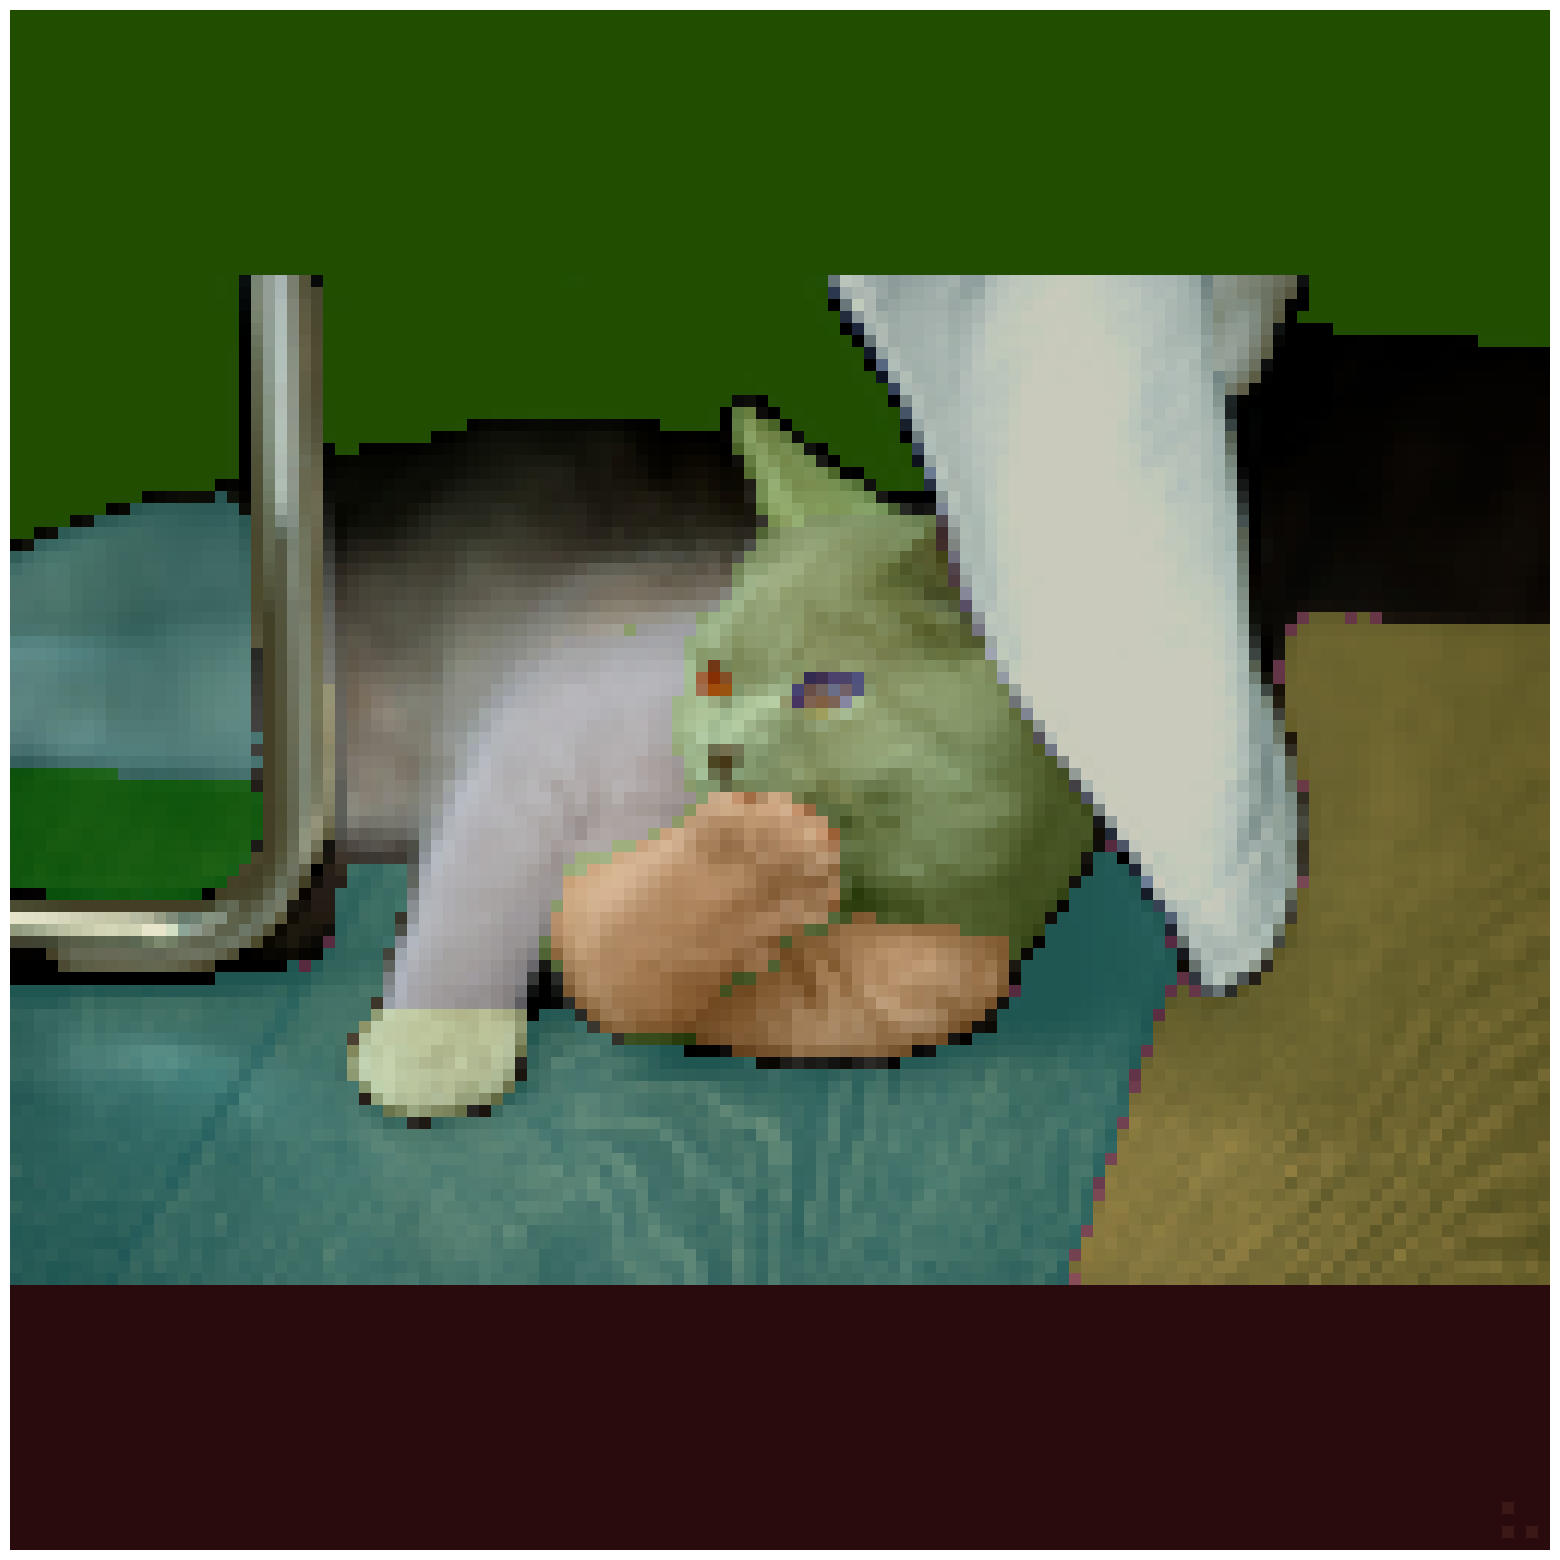

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()